# Happiness score analysis in Baltic Countries

In this project I made after the first lecture at Hyarchis Data Science Academy, I made several analysis to check my Pandas and Data manipulation skills. 

## 1.Scan all data

First let's import all the necessary libraries (I used pip)

### Import libraries

In [10]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import pathlib


### Read all data

The data loading and cleaning part was the hardest for me because I had to read from several files and combine them in one understandable table.

In [11]:
filenames= ['data/2015.csv', 'data/2016.csv','data/2017.csv','data/2018.csv','data/2019.csv','data/2020.csv','data/2021.csv','data/2022.csv']
df_list=[]
for file in filenames:
    temp_df=pd.read_csv(file,on_bad_lines='skip')
    df_list.append(temp_df)

In [12]:
#pd.set_option('display.max_columns', None)
#all_df = pd.concat(map(pd.read_csv, ['data/2015.csv', 'data/2016.csv','data/2017.csv','data/2018.csv','data/2019.csv','data/2020.csv','data/2021.csv','data/2022.csv']), ignore_index=True)
#all_df.shape

In [13]:
df_list[3].rename(columns={"Country or region": "Country"}, inplace=True)
df_list[4].rename(columns={"Country or region": "Country"}, inplace=True)
df_list[5].rename(columns={"Country name": "Country"}, inplace=True)
df_list[6].rename(columns={"Country name": "Country"}, inplace=True)

In [14]:
#in one file overall rank column does not exist. LEt's add it.
df_list[5]['Overall rank'] = df_list[5].index + 1
df_list[6]['Overall rank'] = df_list[6].index + 1


In [15]:
df_list[7]["Happiness score"]=df_list[7]['Happiness score'].str.replace(',', '.').astype(float)
df_list[7].head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,"7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,7.636,"7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,7.557,"7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,7.512,"7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,7.415,"7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


## 2. Happiness score between 2015-2022

In [16]:
needed_columns=["Country","Region","Happiness Rank","Happiness Score","Happiness.Rank","Happiness.Score","Overall rank","Overall_rank","Score","Ladder score","RANK","Happiness score"]
for frame in df_list:
    for column in frame.columns:
        if column not in needed_columns:
            frame.drop(column,axis=1,inplace=True)


In [17]:
data_df = df_list[0].merge(df_list[1],on='Country',suffixes=("_2015","_2016")).merge(df_list[2],on='Country',suffixes=(None,"_2017")).merge(df_list[3],on='Country',suffixes=(None,"_2018")).merge(df_list[4],on='Country',suffixes=(None,"_2019")).merge(df_list[5],on='Country',suffixes=(None,"_2020")).merge(df_list[6],on='Country',suffixes=(None,"_2021")).merge(df_list[7],on='Country',suffixes=(None,"_2022"))
data_df.drop("Region_2016",axis=1,inplace=True)
data_df.head()


,Country,Region_2015,Happiness Rank_2015,Happiness Score_2015,Happiness Rank_2016,Happiness Score_2016,Happiness.Rank,Happiness.Score,Overall rank,Score,Overall rank_2019,Score_2019,Ladder score,Overall rank_2020,Ladder score_2021,Overall rank_2021,RANK,Happiness score
0,Switzerland,Western Europe,1,7.587,2,7.509,4,7.494,5,7.487,6,7.480,7.5599,3,7.571,3,4,7.512
1,Iceland,Western Europe,2,7.561,3,7.501,3,7.504,4,7.495,4,7.494,7.5045,4,7.554,4,3,7.557
2,Denmark,Western Europe,3,7.527,1,7.526,2,7.522,3,7.555,2,7.600,7.6456,2,7.620,2,2,7.636
3,Norway,Western Europe,4,7.522,4,7.498,1,7.537,2,7.594,3,7.554,7.4880,5,7.392,6,8,7.365
4,Canada,North America,5,7.427,6,7.404,7,7.316,7,7.328,9,7.278,7.2321,11,7.103,14,15,7.025


### Divide dataframe into Rank data and Score data lists

In [18]:
divide_df=data_df.copy()

In [19]:
rank_df=divide_df.select_dtypes(exclude ='float64')
rank_df

,Country,Region_2015,Happiness Rank_2015,Happiness Rank_2016,Happiness.Rank,Overall rank,Overall rank_2019,Overall rank_2020,Overall rank_2021,RANK
0,Switzerland,Western Europe,1,2,4,5,6,3,3,4
1,Iceland,Western Europe,2,3,3,4,4,4,4,3
2,Denmark,Western Europe,3,1,2,3,2,2,2,2
3,Norway,Western Europe,4,4,1,2,3,5,6,8
4,Canada,North America,5,6,7,7,9,11,14,15
...,...,...,...,...,...,...,...,...,...,...
112,Ivory Coast,Sub-Saharan Africa,151,139,128,107,99,85,85,88
113,Burkina Faso,Sub-Saharan Africa,152,145,134,121,115,112,113,113
114,Afghanistan,Southern Asia,153,154,141,145,154,153,149,146
115,Benin,Sub-Saharan Africa,155,153,143,136,102,86,99,115


In [20]:
score_df=divide_df.select_dtypes(exclude ='int64')
score_df

,Country,Region_2015,Happiness Score_2015,Happiness Score_2016,Happiness.Score,Score,Score_2019,Ladder score,Ladder score_2021,Happiness score
0,Switzerland,Western Europe,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,7.512
1,Iceland,Western Europe,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,7.557
2,Denmark,Western Europe,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,7.636
3,Norway,Western Europe,7.522,7.498,7.537,7.594,7.554,7.4880,7.392,7.365
4,Canada,North America,7.427,7.404,7.316,7.328,7.278,7.2321,7.103,7.025
...,...,...,...,...,...,...,...,...,...,...
112,Ivory Coast,Sub-Saharan Africa,3.655,3.916,4.180,4.671,4.944,5.2333,5.306,5.235
113,Burkina Faso,Sub-Saharan Africa,3.587,3.739,4.032,4.424,4.587,4.7687,4.834,4.670
114,Afghanistan,Southern Asia,3.575,3.360,3.794,3.632,3.203,2.5669,2.523,2.404
115,Benin,Sub-Saharan Africa,3.340,3.484,3.657,4.141,4.883,5.2160,5.045,4.623


In [21]:
#rank_df.set_index('Country')
rank_df.drop("Region_2015",axis=1, inplace=True)
rank_df

,Country,Happiness Rank_2015,Happiness Rank_2016,Happiness.Rank,Overall rank,Overall rank_2019,Overall rank_2020,Overall rank_2021,RANK
0,Switzerland,1,2,4,5,6,3,3,4
1,Iceland,2,3,3,4,4,4,4,3
2,Denmark,3,1,2,3,2,2,2,2
3,Norway,4,4,1,2,3,5,6,8
4,Canada,5,6,7,7,9,11,14,15
...,...,...,...,...,...,...,...,...,...
112,Ivory Coast,151,139,128,107,99,85,85,88
113,Burkina Faso,152,145,134,121,115,112,113,113
114,Afghanistan,153,154,141,145,154,153,149,146
115,Benin,155,153,143,136,102,86,99,115


In [22]:
rank_df = rank_df.set_index('Country')
#rank_df.set_index('Country')

In [23]:
rank_df.columns = ["2015","2016","2017","2018","2019","2020","2021","2022"]

In [24]:
rank_df.loc["Lithuania"]

2015    56
2016    60
2017    52
2018    50
2019    42
2020    41
2021    38
2022    34
Name: Lithuania, dtype: int64

In [25]:
score_df.columns = ["Country","Region","2015","2016","2017","2018","2019","2020","2021","2022"]

score_with_region=score_df.copy()


In [26]:
score_df = score_df.set_index('Country')

score_df.drop("Region",axis=1, inplace=True)

score_df.tail()

,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,
Ivory Coast,3.655,3.916,4.180,4.671,4.944,5.2333,5.306,5.235
Burkina Faso,3.587,3.739,4.032,4.424,4.587,4.7687,4.834,4.670
Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669,2.523,2.404
Benin,3.340,3.484,3.657,4.141,4.883,5.2160,5.045,4.623
Togo,2.839,3.303,3.495,3.999,4.085,4.1872,4.107,4.112


## 3. Change of happiness rank in Baltic countries

The first question to answer was how happiness rank changed in Baltic Coutries during 2015-2022. Did it increase or decrease?

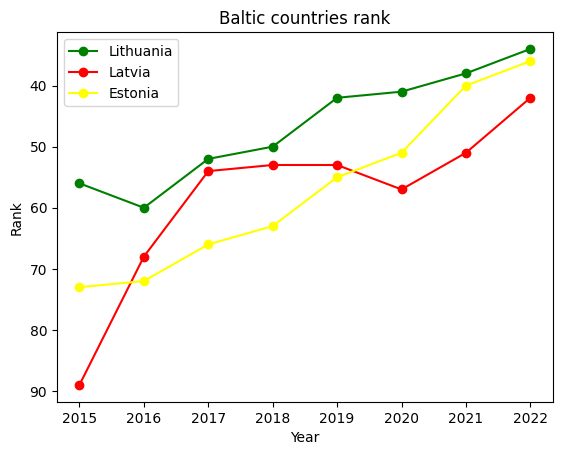

In [27]:
import matplotlib 

figure_1 = rank_df.loc["Lithuania"].plot(kind='line', color='green', marker='o');
rank_df.loc["Latvia"].plot(kind='line',title='Baltic countries rank', ylabel='Rank',xlabel="Year",color='red', marker='o');
rank_df.loc["Estonia"].plot(kind='line',color='yellow', marker='o');
matplotlib.axes.Axes.invert_yaxis(figure_1)
leg = figure_1.legend();

As we can see from line chart above happiness rank had really increased and the highest rank in the last year was in Lithuania as it was in 2015. But Estonia also increased a lot and very close to Lithuania.

## 4. Change of happiness score in Baltic countries

In [28]:
score_df.head()

,2015,2016,2017,2018,2019,2020,2021,2022
Country,,,,,,,,
Switzerland,7.587,7.509,7.494,7.487,7.480,7.5599,7.571,7.512
Iceland,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,7.557
Denmark,7.527,7.526,7.522,7.555,7.600,7.6456,7.620,7.636
Norway,7.522,7.498,7.537,7.594,7.554,7.4880,7.392,7.365
Canada,7.427,7.404,7.316,7.328,7.278,7.2321,7.103,7.025


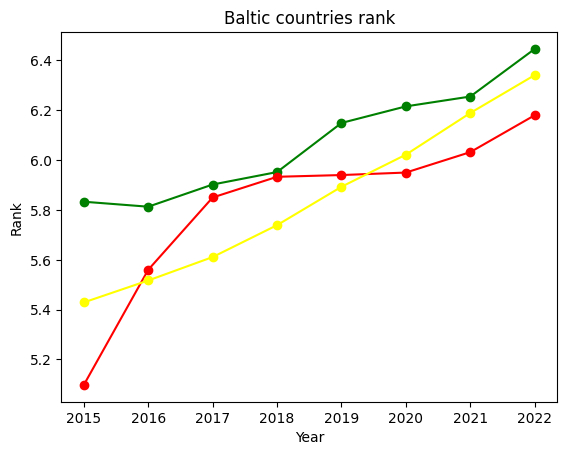

In [29]:

figure_2 = score_df.loc["Lithuania"].plot(kind='line', color='green', marker='o');
score_df.loc["Latvia"].plot(kind='line',title='Baltic countries rank', ylabel='Rank',xlabel="Year",color='red', marker='o');
score_df.loc["Estonia"].plot(kind='line',color='yellow', marker='o');
leg = figure_1.legend();

## 5. 5 Countries happiness score incresed/dropped the most

In [30]:
score_df["Diff of 2022-2015"]=score_df["2022"]-score_df["2015"]
df2=score_df.sort_values(['Diff of 2022-2015'],ascending=True).groupby('Country').head(5)
df2

,2015,2016,2017,2018,2019,2020,2021,2022,Diff of 2022-2015
Country,,,,,,,,,
Venezuela,6.810,6.084,5.250,4.806,4.707,5.0532,4.892,4.925,-1.885
Lebanon,4.839,5.129,5.225,5.358,5.197,4.7715,4.584,2.955,-1.884
Zimbabwe,4.610,4.193,3.875,3.692,3.663,3.2992,3.145,2.995,-1.615
Zambia,5.129,4.795,4.514,4.377,4.107,3.7594,4.073,3.760,-1.369
Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669,2.523,2.404,-1.171
...,...,...,...,...,...,...,...,...,...
Togo,2.839,3.303,3.495,3.999,4.085,4.1872,4.107,4.112,1.273
Benin,3.340,3.484,3.657,4.141,4.883,5.2160,5.045,4.623,1.283
Hungary,4.800,5.145,5.324,5.620,5.758,6.0004,5.992,6.086,1.286


## 6. Happiness score the most stable

In [31]:
rank_df.describe()

,2015,2016,2017,2018,2019,2020,2021,2022
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,73.769231,73.170940,70.658120,70.555556,70.111111,69.059829,68.299145,68.350427
std,45.439688,44.111006,42.480049,42.421214,42.729659,42.329229,41.666423,41.872202
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,33.000000,34.000000,35.000000,35.000000,34.000000,34.000000,33.000000
50%,73.000000,73.000000,72.000000,69.000000,67.000000,65.000000,64.000000,64.000000
75%,111.000000,110.000000,106.000000,106.000000,104.000000,105.000000,105.000000,106.000000
max,158.000000,155.000000,153.000000,153.000000,154.000000,153.000000,149.000000,146.000000


In [32]:
score_df["Abs change diff"]=abs(score_df["2022"]-score_df["2015"])
df3=score_df.sort_values(['Abs change diff'],ascending=True).groupby('Country').head(5)
df3.head(5)

,2015,2016,2017,2018,2019,2020,2021,2022,Diff of 2022-2015,Abs change diff
Country,,,,,,,,,,
Iceland,7.561,7.501,7.504,7.495,7.494,7.5045,7.554,7.557,-0.004,0.004
El Salvador,6.130,6.068,6.003,6.167,6.253,6.3483,6.061,6.120,-0.010,0.010
Uruguay,6.485,6.545,6.454,6.379,6.293,6.4401,6.431,6.474,-0.011,0.011
Sweden,7.364,7.291,7.284,7.314,7.343,7.3535,7.363,7.384,0.020,0.020
Moldova,5.889,5.897,5.838,5.640,5.529,5.6075,5.766,5.857,-0.032,0.032


## 7. Happiness rank change

In [33]:
rank_df["Abs change diff"]=abs(rank_df["2022"]-rank_df["2015"])
df4=rank_df.sort_values(['Abs change diff'],ascending=True).groupby('Country').head(5)
df4.head(5)

,2015,2016,2017,2018,2019,2020,2021,2022,Abs change diff
Country,,,,,,,,,
Belgium,19,18,17,16,18,20,20,19,0
Iran,110,105,108,106,117,118,118,110,0
United States,15,13,14,18,19,18,19,16,1
Sweden,8,10,9,9,7,7,7,7,1
New Zealand,9,8,8,8,8,8,9,10,1


## 8. Describe avg score for each year for regions

In [34]:
gk = score_with_region.groupby('Region').mean()
pd.set_option('display.max_columns', None)
# Let's print the first entries
# in all the groups formed.
gk


,2015,2016,2017,2018,2019,2020,2021,2022
Region,,,,,,,,
Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.267500,7.261200,7.230000,7.181000
Central and Eastern Europe,5.273750,5.303417,5.353292,5.426625,5.557500,5.684604,5.812833,5.899625
Eastern Asia,5.496250,5.477000,5.496500,5.540250,5.564250,5.580825,5.700250,5.830000
Latin America and Caribbean,6.228056,6.147667,6.049500,6.043944,6.045444,6.072550,6.006167,5.933056
Middle East and Northern Africa,5.448231,5.581462,5.553000,5.445308,5.388077,5.322354,5.311154,5.213538
North America,7.273000,7.254000,7.154500,7.107000,7.085000,7.085850,7.027000,7.001000
Southeastern Asia,5.372625,5.396750,5.444875,5.399750,5.333375,5.445213,5.454750,5.468125
Southern Asia,4.468833,4.457833,4.564667,4.524167,4.434333,4.355083,4.315833,4.265167
Sub-Saharan Africa,4.205952,4.203857,4.281857,4.423238,4.504143,4.569843,4.608810,4.519952
